In [3]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import seaborn as sn
import matplotlib.pyplot as plt

df= pd.read_csv('tn.movie_budgets.csv.gz')
df

In [4]:
df= pd.read_csv('tn.movie_budgets.csv.gz') 
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [5]:
budg= pd.read_csv('tn.movie_budgets.csv.gz')
budg['production_budget']=budg['production_budget'].str.replace(',','')
budg['domestic_gross']=budg['domestic_gross'].str.replace(',','')
budg['worldwide_gross']=budg['worldwide_gross'].str.replace(',','')
budg['production_budget']=budg['production_budget'].str.replace('$','').astype('int64')
budg['domestic_gross']=budg['domestic_gross'].str.replace('$','').astype('int64')
budg['worldwide_gross']=budg['worldwide_gross'].str.replace('$','').astype('int64')
#made sure the data was all integers in order for it to be able to sorted and analyzed
budg['net_pre_marketing']=budg['worldwide_gross']-budg['production_budget']
#made this column to indicate the best of my abilities the net profit
#it is unclear if advertising money is included(though i'm assuming it is not)
budg['domestic/world']=budg['domestic_gross']/budg['worldwide_gross']
#made this money to detirmine what percentage of worldwide earning were domestic
budg=budg.dropna()
budg['earnings/cost_ratio']=budg['net_pre_marketing']/budg['production_budget']
#this works as a percentage the movie recouperated its production budget
budg['year_released']=budg['release_date'].str[-4:].astype('int64')
#made a new column which has the year the film was released in order to be able to drop the movies made pre-2010
budg.drop(budg[budg['year_released'] < 2010].index, inplace = True)
budg.sort_values('earnings/cost_ratio').tail(25)

<ipython-input-5-3854280c5a05>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  budg['production_budget']=budg['production_budget'].str.replace('$','').astype('int64')
<ipython-input-5-3854280c5a05>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  budg['domestic_gross']=budg['domestic_gross'].str.replace('$','').astype('int64')
<ipython-input-5-3854280c5a05>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  budg['worldwide_gross']=budg['worldwide_gross'].str.replace('$','').astype('int64')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released
5216,17,"Aug 23, 2013",You're Next,1000000,18494006,26887177,25887177,0.687837,25.887177,2013
4590,91,"Apr 13, 2018",Truth or Dare,3500000,41411015,95127344,91627344,0.435322,26.179241,2018
5685,86,"Jul 7, 2017",A Ghost Story,100000,1594798,2769782,2669782,0.575785,26.697820,2017
4258,59,"Oct 19, 2012",Paranormal Activity 4,5000000,53900335,142817992,137817992,0.377406,27.563598,2012
2996,97,"Nov 26, 2010",The Kingâs Speech,15000000,138797449,430821168,415821168,0.322170,27.721411,2010
4668,69,"Oct 12, 2012",Sinister,3000000,48086903,87727807,84727807,0.548138,28.242602,2012
4254,55,"Jul 22, 2016",Lights Out,5000000,67268835,148806510,143806510,0.452056,28.761302,2016
4666,67,"Jun 7, 2013",The Purge,3000000,64473115,91266581,88266581,0.706426,29.422194,2013
5358,59,"Dec 30, 2011",Jodaeiye Nader az Simin,800000,7098492,24426169,23626169,0.290610,29.532711,2011
3755,56,"Dec 21, 2016",Dangal,9500000,12391761,294654618,285154618,0.042055,30.016276,2016


In [6]:
#"in a very broad sense movies haven't made any money until
#their box office roughly equals twice the money spent on production."
#https://www.fool.com/investing/2019/08/06/why-box-office-results-dont-really-explain-how-mov.aspx#:~:text=But%20it's%20important%20to%20remember,the%20movie%20but%20marketing%20it.
#I am going to use the budget data to detirmine if a movie is profitable
#I can do this by creating a column that tells me if a movies earnings/cost ration is above 1 or not
budgP=budg
budgP['Profitable?']= np.where(budgP['earnings/cost_ratio']>= 2, True, False)
budgP.sort_values('earnings/cost_ratio')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
5302,3,"Dec 11, 2015",American Hero,1000000,0,26,-999974,0.000000,-0.999974,2015,False
4081,82,"May 21, 2010",Perrierâs Bounty,6600000,828,828,-6599172,1.000000,-0.999875,2010,False
3818,19,"May 8, 2015",Skin Trade,9000000,1242,1242,-8998758,1.000000,-0.999862,2015,False
5335,36,"Nov 21, 2014",Food Chains,913000,0,176,-912824,0.000000,-0.999807,2014,False
3161,62,"Sep 1, 2015",Broken Horses,15000000,0,3471,-14996529,0.000000,-0.999769,2015,False
...,...,...,...,...,...,...,...,...,...,...,...
4664,65,"Oct 20, 2010",Paranormal Activity 2,3000000,84752907,177512032,174512032,0.477449,58.170677,2010,True
5213,14,"Apr 17, 2015",Unfriended,1000000,32789645,64364198,63364198,0.509439,63.364198,2015,True
5062,63,"Apr 1, 2011",Insidious,1500000,54009150,99870886,98370886,0.540790,65.580591,2011,True
5211,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,100759490,0.523420,100.759490,2012,True


In [7]:
gross= pd.read_csv('bom.movie_gross.csv.gz')
gross.sort_values('domestic_gross', ascending=False)
gross['foreign_gross']=gross['foreign_gross'].str.replace(',','').astype('float64')
gross['worldwide_gross']=gross['domestic_gross']+gross['domestic_gross']
gross.sort_values('worldwide_gross', ascending=False)
gross=gross.dropna()
gross.sort_values('worldwide_gross', ascending= False)


,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,1.873400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.400200e+09
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018,1.357600e+09
1873,Jurassic World,Uni.,652300000.0,1019.4,2015,1.304600e+09
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.246800e+09
...,...,...,...,...,...,...
292,Perrier's Bounty,IFC,800.0,167000.0,2010,1.600000e+03
1738,Jackpot,DR,800.0,1100000.0,2014,1.600000e+03
2920,Amityville: The Awakening,W/Dim.,700.0,7700000.0,2017,1.400000e+03
642,Illegal (2011),FM,700.0,289000.0,2011,1.400000e+03


In [8]:
title= pd.read_csv('imdb.title.akas.csv.gz')
title

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [9]:
name= pd.read_csv('imdb.name.basics.csv.gz')
name

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [10]:
titles_bas= pd.read_csv('imdb.title.basics.csv.gz')
titles_bas=titles_bas.dropna()
titles_bas

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [11]:
title_crew= pd.read_csv('imdb.title.crew.csv.gz')
title_crew

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


In [12]:
title_prin= pd.read_csv('imdb.title.principals.csv.gz')
title_prin

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [13]:
title_ratings= pd.read_csv('imdb.title.ratings.csv.gz')
title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [14]:
rotten_rev= pd.read_csv('rotten_tomatoes_critic_reviews.csv.gz')
rotten_rev

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
...,...,...,...,...,...,...,...,...
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5,2005-11-02,NaN
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


In [15]:
rotten_mov= pd.read_csv('rotten_tomatoes_movies.csv.gz')
rotten_mov


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,...,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,...,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1


In [16]:
tmdbmov= pd.read_csv('tmdb.movies.csv.gz')
tmdbmov


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [17]:
mega_table= pd.read_csv('Merge_mega_table.csv')
mega_table.sort_values('worldwide_gross')

,Unnamed: 0,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
136,247,tt1763303,6.9,62589.0,The First Time,2012,95.0,"Comedy,Drama,Romance",67.0,"Oct 19, 2012",2000000.0,17061.0,17061.0,-1982939.0,1.000000,-0.991470,2012.0,False
160,316,tt2059171,6.3,29550.0,13 Sins,2014,93.0,"Horror,Thriller",51.0,"Apr 18, 2014",4000000.0,9134.0,47552.0,-3952448.0,0.192084,-0.988112,2014.0,False
188,405,tt2398249,5.5,19832.0,They Came Together,2014,83.0,"Comedy,Romance",58.0,"Jun 27, 2014",3000000.0,0.0,82780.0,-2917220.0,0.000000,-0.972407,2014.0,False
249,586,tt4995790,7.2,44239.0,The Square,2017,151.0,"Comedy,Drama",100.0,"Oct 25, 2013",1500000.0,124244.0,176262.0,-1323738.0,0.704883,-0.882492,2013.0,False
36,53,tt1183923,7.0,22210.0,Welcome to the Rileys,2010,110.0,Drama,12.0,"Oct 29, 2010",10000000.0,152857.0,355919.0,-9644081.0,0.429471,-0.964408,2010.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,432,tt2582846,7.7,315135.0,The Fault in Our Stars,2014,126.0,"Drama,Romance",43.0,"Jun 6, 2014",12000000.0,124872350.0,307166834.0,295166834.0,0.406529,24.597236,2014.0,True
21,28,tt0970866,5.5,99222.0,Little Fockers,2010,98.0,"Comedy,Romance",70.0,"Dec 22, 2010",100000000.0,148438600.0,310650574.0,210650574.0,0.477831,2.106506,2010.0,True
60,100,tt1343092,7.3,433165.0,The Great Gatsby,2013,143.0,"Drama,Romance",70.0,"May 10, 2013",190000000.0,144840419.0,351040419.0,161040419.0,0.412603,0.847581,2013.0,False
237,560,tt4465564,4.6,81706.0,Fifty Shades Darker,2017,118.0,"Drama,Romance",91.0,"Feb 10, 2017",55000000.0,114434010.0,381398492.0,326398492.0,0.300038,5.934518,2017.0,True


In [18]:
best_margin=mega_table.sort_values('earnings/cost_ratio', ascending=False).head(20)
best_margin.value_counts('genres')

genres
Horror,Thriller         6
Drama                   4
Drama,Romance           4
Comedy,Drama            2
Horror                  2
Comedy                  1
Comedy,Drama,Romance    1
dtype: int64

<AxesSubplot:xlabel='production_budget', ylabel='earnings/cost_ratio'>

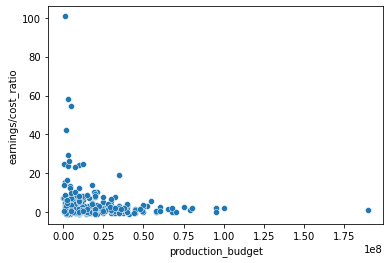

In [19]:
sn.scatterplot(data=mega_table, x="production_budget", y="earnings/cost_ratio")

In [20]:
mega_table2

NameError: name 'mega_table2' is not defined

In [21]:
mega_table2= pd.read_csv('Merge_mega_table2.csv')
most_exp=mega_table2.sort_values('production_budget', ascending = False).head(30)
best_margin=mega_table2.sort_values('earnings/cost_ratio', ascending = False).head(30)

<AxesSubplot:xlabel='earnings/cost_ratio', ylabel='production_budget'>

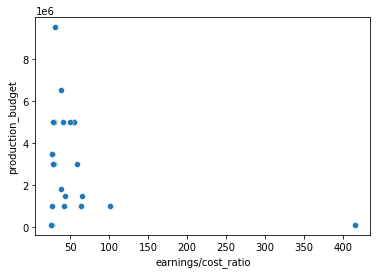

In [22]:
sn.scatterplot(data=best_margin, x="earnings/cost_ratio", y="production_budget")

In [23]:
#due to microsoft being a mjor player financially, it would make sense for their film budget to be similar to other feature films
#being so, I'm going to filter the movies in the dataset to movies that cost over $70 mil to make, which was described as the low end of a feature film
#https://parlaystudios.com/blog/feature-film-budget-breakdown/
feature_films=mega_table2.loc[mega_table2['production_budget']>=50000000]
#feature_films.drop_duplicates(subset=['movie'])
feature_films
#some of the movie values appear suspecct, but should not have a greater impact on entire df

,Unnamed: 0,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
2,34,tt0359950,7.3,275300.0,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37.0,"Dec 25, 2013",91000000.0,58236838.0,1.878612e+08,9.686118e+07,0.309999,1.064409,2013.0,False
4,39,tt0369610,7.0,539338.0,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34.0,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,1.433855e+09,0.395590,6.669092,2015.0,True
7,48,tt0398286,7.8,366366.0,Tangled,2010,100.0,"Adventure,Animation,Comedy",15.0,"Nov 24, 2010",260000000.0,200821936.0,5.864772e+08,3.264772e+08,0.342421,1.255682,2010.0,False
8,50,tt0401729,6.6,241792.0,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",14.0,"Mar 9, 2012",275000000.0,73058679.0,2.827781e+08,7.778100e+06,0.258360,0.028284,2012.0,False
9,66,tt0427152,5.9,91546.0,Dinner for Schmucks,2010,114.0,Comedy,51.0,"Jul 30, 2010",69000000.0,73026337.0,8.679650e+07,1.779650e+07,0.841351,0.257920,2010.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,63522,tt8601408,8.4,32.0,Home,2018,71.0,"Drama,Romance,Thriller",44.0,"Mar 27, 2015",130000000.0,177397510.0,3.859979e+08,2.559979e+08,0.459582,1.969215,2015.0,False
1905,64122,tt8851190,8.1,26.0,Red,2018,90.0,Drama,63.0,"Oct 15, 2010",60000000.0,90380162.0,1.964397e+08,1.364397e+08,0.460091,2.273995,2010.0,True
1906,64262,tt8917752,6.5,430.0,Joy,2018,99.0,Drama,88.0,"Dec 25, 2015",60000000.0,56451232.0,1.011341e+08,4.113406e+07,0.558182,0.685568,2015.0,False
1909,64927,tt9225192,6.5,576.0,Unstoppable,2018,116.0,"Action,Crime",19.0,"Nov 12, 2010",95000000.0,81562942.0,1.657209e+08,7.072092e+07,0.492170,0.744431,2010.0,False


In [24]:
most_prev=feature_films.value_counts('genres').head(20)
top20=most_prev.index
most_prev.index

Index(['Adventure,Animation,Comedy', 'Action,Adventure,Sci-Fi',
       'Action,Adventure,Fantasy', 'Action,Adventure,Drama',
       'Action,Adventure,Comedy', 'Action,Adventure,Animation', 'Comedy',
       'Drama', 'Adventure,Family,Fantasy', 'Action,Adventure,Thriller',
       'Documentary', 'Action,Crime,Thriller', 'Action,Comedy,Crime',
       'Action,Thriller', 'Action,Drama,Thriller', 'Adventure,Comedy,Family',
       'Action,Drama,Sci-Fi', 'Thriller', 'Action,Adventure,Family',
       'Crime,Drama,Mystery'],
      dtype='object', name='genres')

In [25]:
feature_top20
#dataset featuring only movies from the top 20 genres

NameError: name 'feature_top20' is not defined

In [26]:
feature_top20=feature_films.loc[feature_films['genres'].isin(top20)]
genre_dict=dict(feature_top20.groupby('genres').net_pre_marketing.mean())
sort_genre_mean = sorted(genre_dict.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted=dict(sort_genre_mean)

([<matplotlib.axis.YTick at 0x18fc74d2d30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

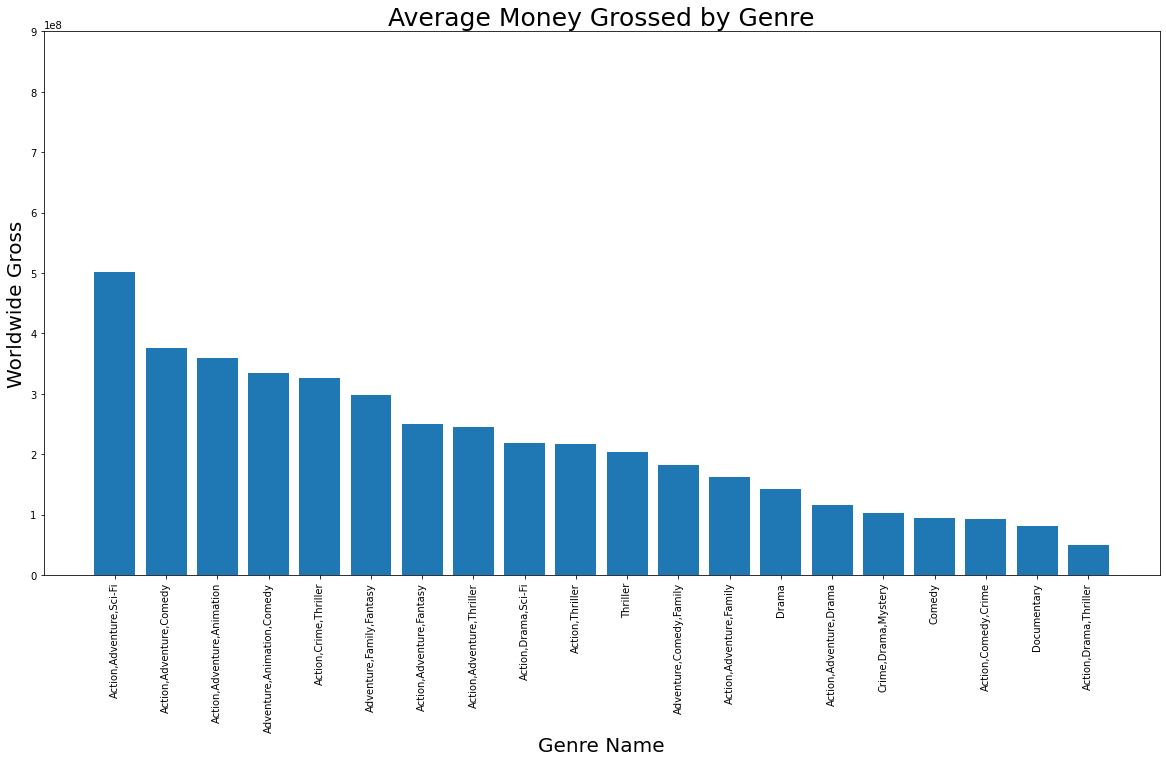

In [27]:
x = genre_mean_sorted.keys()
y = genre_mean_sorted.values()
plot_one_fig, plot_one_ax= plt.subplots(figsize=(20, 10))
plot_one_ax.set_title('Average Money Grossed by Genre', fontsize=25)
plot_one_ax.set_ylabel('Worldwide Gross', fontsize=20)
plot_one_ax.set_xlabel('Genre Name', fontsize=20)
plot_one_ax.bar(x,y)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1000000000, 100000000))


In [28]:
actadvensci=feature_top20.loc[feature_top20['genres']== 'Action,Adventure,Sci-Fi']
actadvensci.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 4 to 1841
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           50 non-null     int64  
 1   tconst               50 non-null     object 
 2   averagerating        50 non-null     float64
 3   numvotes             50 non-null     float64
 4   movie                50 non-null     object 
 5   start_year           50 non-null     int64  
 6   runtime_minutes      50 non-null     float64
 7   genres               50 non-null     object 
 8   id                   50 non-null     float64
 9   release_date         50 non-null     object 
 10  production_budget    50 non-null     float64
 11  domestic_gross       50 non-null     float64
 12  worldwide_gross      50 non-null     float64
 13  net_pre_marketing    50 non-null     float64
 14  domestic/world       50 non-null     float64
 15  earnings/cost_ratio  50 non-null     flo

In [29]:
actadvencom=feature_top20.loc[feature_top20['genres']== 'Action,Adventure,Comedy']
actadvencom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 19 to 1744
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           18 non-null     int64  
 1   tconst               18 non-null     object 
 2   averagerating        18 non-null     float64
 3   numvotes             18 non-null     float64
 4   movie                18 non-null     object 
 5   start_year           18 non-null     int64  
 6   runtime_minutes      18 non-null     float64
 7   genres               18 non-null     object 
 8   id                   18 non-null     float64
 9   release_date         18 non-null     object 
 10  production_budget    18 non-null     float64
 11  domestic_gross       18 non-null     float64
 12  worldwide_gross      18 non-null     float64
 13  net_pre_marketing    18 non-null     float64
 14  domestic/world       18 non-null     float64
 15  earnings/cost_ratio  18 non-null     fl

In [30]:
actadvenani=feature_top20.loc[feature_top20['genres']== 'Action,Adventure,Animation']
actadvenani.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 20 to 1601
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           15 non-null     int64  
 1   tconst               15 non-null     object 
 2   averagerating        15 non-null     float64
 3   numvotes             15 non-null     float64
 4   movie                15 non-null     object 
 5   start_year           15 non-null     int64  
 6   runtime_minutes      15 non-null     float64
 7   genres               15 non-null     object 
 8   id                   15 non-null     float64
 9   release_date         15 non-null     object 
 10  production_budget    15 non-null     float64
 11  domestic_gross       15 non-null     float64
 12  worldwide_gross      15 non-null     float64
 13  net_pre_marketing    15 non-null     float64
 14  domestic/world       15 non-null     float64
 15  earnings/cost_ratio  15 non-null     fl

In [31]:
feature_top20['month_released']=feature_top20['release_date'].str[:3]


<ipython-input-31-b04bc0a7de21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_top20['month_released']=feature_top20['release_date'].str[:3]


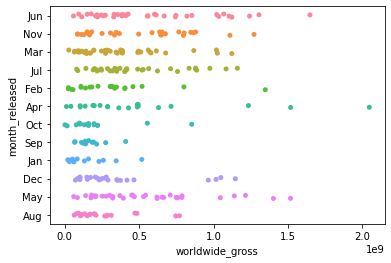

In [32]:
ax = sn.stripplot(x="worldwide_gross", y="month_released", data=feature_top20)

In [33]:
mega_table2['month_released']=mega_table2['release_date'].str[:3]
period1=['Jan','Feb','Mar','Apr']
period_1=mega_table2.loc[mega_table2['month_released'].isin(period1)]
period2=['May','Jun','Jul','Aug']
period_2=mega_table2.loc[mega_table2['month_released'].isin(period2)]
period3=['Sep','Oct','Nov','Dec']
period_3=mega_table2.loc[mega_table2['month_released'].isin(period3)]

In [34]:
period_1[period_1['numvotes']>= 10000]

,Unnamed: 0,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?,month_released
1,30,tt0337692,6.1,37886.0,On the Road,2012,124.0,"Adventure,Drama,Romance",17.0,"Mar 22, 2013",25000000.0,720828.0,9313302.0,-15686698.0,0.077398,-0.627468,2013.0,False,Mar
6,45,tt0383010,5.1,28570.0,The Three Stooges,2012,92.0,"Comedy,Family",4.0,"Apr 13, 2012",30000000.0,44338224.0,54052249.0,24052249.0,0.820285,0.801742,2012.0,False,Apr
8,50,tt0401729,6.6,241792.0,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",14.0,"Mar 9, 2012",275000000.0,73058679.0,282778100.0,7778100.0,0.258360,0.028284,2012.0,False,Mar
15,78,tt0437086,7.5,88207.0,Alita: Battle Angel,2019,122.0,"Action,Adventure,Sci-Fi",24.0,"Feb 14, 2019",170000000.0,85710210.0,402976036.0,232976036.0,0.212693,1.370447,2019.0,False,Feb
19,89,tt0448115,7.4,109051.0,Shazam!,2019,132.0,"Action,Adventure,Comedy",97.0,"Apr 5, 2019",85000000.0,139606856.0,362899733.0,277899733.0,0.384698,3.269409,2019.0,True,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,57280,tt6857112,7.1,102511.0,Us,2019,116.0,"Horror,Mystery,Thriller",88.0,"Mar 22, 2019",20000000.0,175006930.0,254210310.0,234210310.0,0.688434,11.710515,2019.0,True,Mar
1870,58547,tt7153766,6.4,32049.0,Unsane,2018,98.0,"Drama,Horror,Mystery",70.0,"Mar 23, 2018",1500000.0,7690044.0,14244931.0,12744931.0,0.539844,8.496621,2018.0,True,Mar
1883,60647,tt7634968,4.9,10141.0,What Men Want,2019,117.0,"Comedy,Fantasy,Romance",21.0,"Feb 8, 2019",20000000.0,54611903.0,69911903.0,49911903.0,0.781153,2.495595,2019.0,True,Feb
1892,61789,tt7961060,8.0,16465.0,Dragon Ball Super: Broly,2018,100.0,"Action,Adventure,Animation",36.0,"Jan 16, 2019",8500000.0,30376755.0,122747755.0,114247755.0,0.247473,13.440912,2019.0,True,Jan


In [35]:
period_2[period_2['numvotes']>= 10000]
p2genres=period_2.value_counts('genres').head(20)
p2mostprev=p2genres.index
period_2_top_genres=period_2.loc[period_2['genres'].isin(p2mostprev)]

In [36]:
period_3[period_3['numvotes']>= 10000]

,Unnamed: 0,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?,month_released
2,34,tt0359950,7.3,275300.0,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37.0,"Dec 25, 2013",91000000.0,58236838.0,187861183.0,96861183.0,0.309999,1.064409,2013.0,False,Dec
3,38,tt0365907,6.5,105116.0,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",67.0,"Sep 19, 2014",28000000.0,26017685.0,62108587.0,34108587.0,0.418906,1.218164,2014.0,False,Sep
5,41,tt0376136,6.2,94787.0,The Rum Diary,2011,119.0,"Comedy,Drama",16.0,"Oct 28, 2011",45000000.0,13109815.0,21544732.0,-23455268.0,0.608493,-0.521228,2011.0,False,Oct
7,48,tt0398286,7.8,366366.0,Tangled,2010,100.0,"Adventure,Animation,Comedy",15.0,"Nov 24, 2010",260000000.0,200821936.0,586477240.0,326477240.0,0.342421,1.255682,2010.0,False,Nov
12,72,tt0433035,7.1,283534.0,Real Steel,2011,127.0,"Action,Drama,Family",31.0,"Oct 7, 2011",110000000.0,85463309.0,263880341.0,153880341.0,0.323871,1.398912,2011.0,False,Oct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,58423,tt7125860,7.2,25512.0,If Beale Street Could Talk,2018,119.0,"Drama,Romance",96.0,"Dec 14, 2018",12000000.0,14915773.0,19859167.0,7859167.0,0.751077,0.654931,2018.0,False,Dec
1868,58481,tt7137380,6.2,13683.0,Destroyer,2018,121.0,"Action,Crime,Drama",5.0,"Dec 25, 2018",9000000.0,1533324.0,3681096.0,-5318904.0,0.416540,-0.590989,2018.0,False,Dec
1878,59653,tt7401588,7.4,46728.0,Instant Family,2018,118.0,"Comedy,Drama",20.0,"Nov 16, 2018",48000000.0,67363237.0,119736188.0,71736188.0,0.562597,1.494504,2018.0,False,Nov
1891,61775,tt7959026,7.1,58955.0,The Mule,2018,116.0,"Crime,Drama,Thriller",100.0,"Dec 14, 2018",50000000.0,103804407.0,170857676.0,120857676.0,0.607549,2.417154,2018.0,True,Dec


<AxesSubplot:xlabel='averagerating', ylabel='worldwide_gross'>

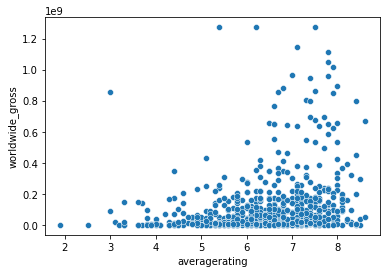

In [37]:
sn.scatterplot(data=period_3, x="averagerating", y="worldwide_gross")

In [38]:
period_2_top_genres['ec_ratio']=period_2_top_genres["earnings/cost_ratio"]

<ipython-input-38-80650c671d28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_2_top_genres['ec_ratio']=period_2_top_genres["earnings/cost_ratio"]


In [39]:
period_2_top_genres.sort_values('ec_ratio')
period_2_top_genres = period_2_top_genres.drop(1119)

In [40]:
period_2_top_genres.describe()

,Unnamed: 0,averagerating,numvotes,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,ec_ratio
count,320.000000,320.000000,3.200000e+02,320.000000,320.000000,320.000000,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,320.000000,320.000000,320.000000,320.000000
mean,18599.571875,6.384687,1.322104e+05,2013.803125,104.909375,50.950000,6.141601e+07,7.947897e+07,2.083057e+08,1.468897e+08,0.496284,2.708428,2013.934375,2.708428
std,17940.706264,0.996601,2.005015e+05,2.628871,19.641965,28.545031,7.451699e+07,1.086566e+08,3.042731e+08,2.507457e+08,0.294060,5.098369,2.512428,5.098369
min,39.000000,2.400000,5.000000e+00,2010.000000,40.000000,2.000000,5.000000e+04,0.000000e+00,1.242000e+03,-2.002376e+08,0.000000,-0.999862,2010.000000,-0.999862
25%,2813.750000,5.800000,4.593500e+03,2011.000000,91.750000,27.000000,7.000000e+06,1.758242e+06,7.419838e+06,3.431150e+04,0.297828,0.006523,2012.000000,0.006523
50%,13132.500000,6.400000,6.012050e+04,2014.000000,103.000000,51.000000,2.550000e+07,4.074572e+07,7.065228e+07,4.114846e+07,0.437273,1.258581,2014.000000,1.258581
75%,29716.500000,7.100000,1.758180e+05,2016.000000,117.000000,76.000000,1.000000e+08,1.060718e+08,2.819911e+08,1.809037e+08,0.735325,3.268655,2016.000000,3.268655
max,65704.000000,9.200000,1.841066e+06,2019.000000,165.000000,100.000000,4.106000e+08,6.522706e+08,1.648855e+09,1.433855e+09,1.000000,41.411721,2019.000000,41.411721


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

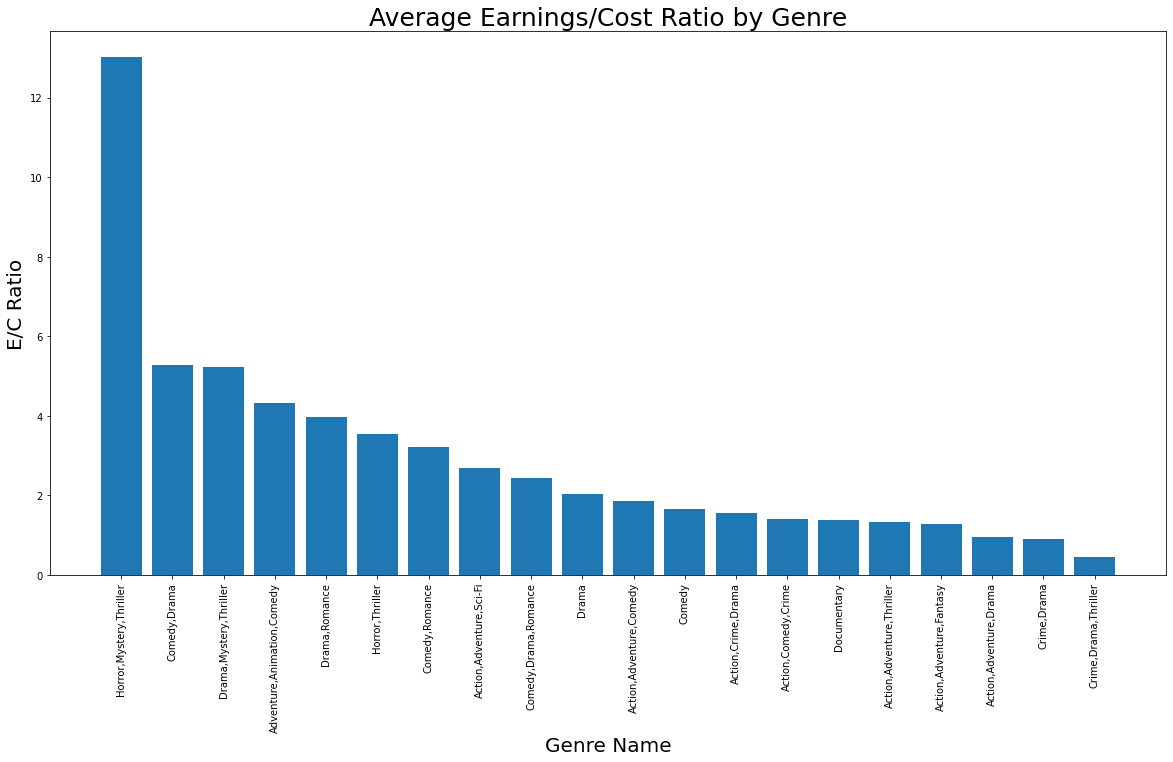

In [41]:

genre_dict2=dict(period_2_top_genres.groupby('genres').ec_ratio.mean())
sort_genre_mean2 = sorted(genre_dict2.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted2=dict(sort_genre_mean2)
genre_mean_sorted2
plot_two, plot_two_ax= plt.subplots(figsize=(20, 10))
plot_two_ax.bar(genre_mean_sorted2.keys(),genre_mean_sorted2.values())
plot_two_ax.set_title('Average Earnings/Cost Ratio by Genre', fontsize=25)
plot_two_ax.set_ylabel('E/C Ratio', fontsize=20)
plot_two_ax.set_xlabel('Genre Name', fontsize=20)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

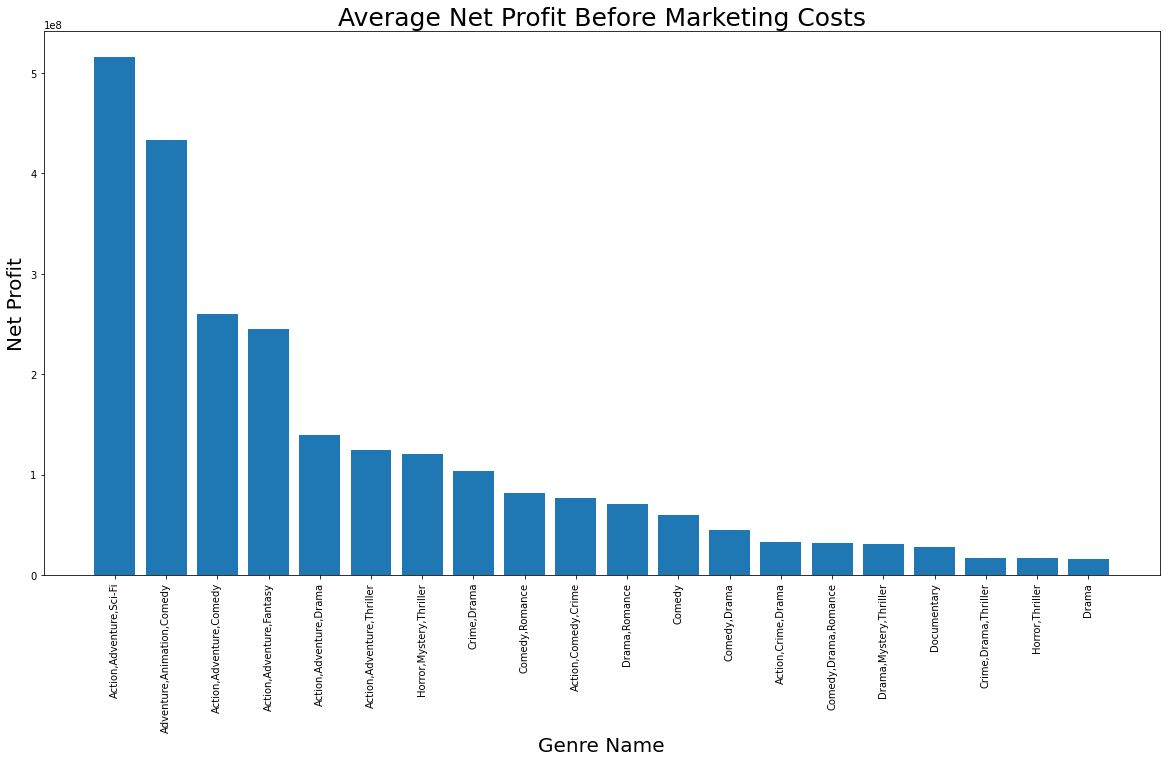

In [42]:
genre_dict2_=dict(period_2_top_genres.groupby('genres').net_pre_marketing.mean())
sort_genre_mean2_ = sorted(genre_dict2_.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted2_=dict(sort_genre_mean2_)
genre_mean_sorted2_
plot_two_, plot_two_ax_= plt.subplots(figsize=(20, 10))
plot_two_ax_.bar(genre_mean_sorted2_.keys(),genre_mean_sorted2_.values())
plot_two_ax_.set_title('Average Net Profit Before Marketing Costs', fontsize=25)
plot_two_ax_.set_ylabel('Net Profit', fontsize=20)
plot_two_ax_.set_xlabel('Genre Name', fontsize=20)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

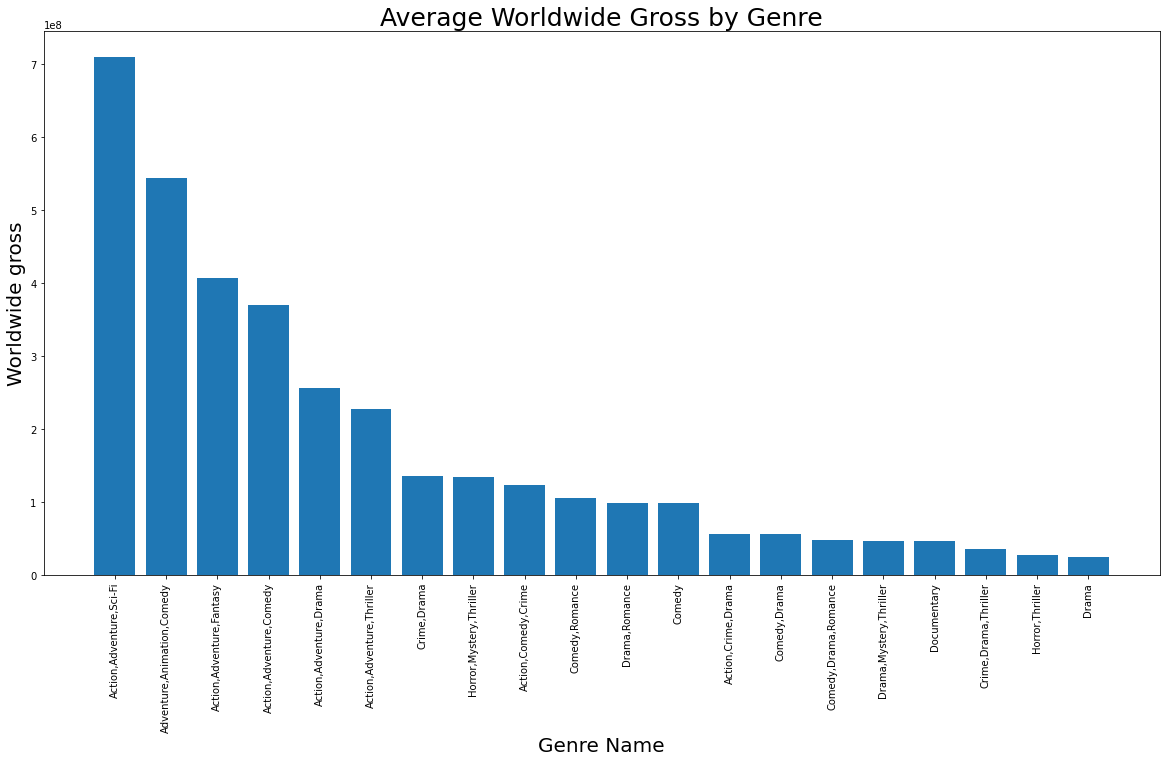

In [43]:
genre_dict2__=dict(period_2_top_genres.groupby('genres').worldwide_gross.mean())
sort_genre_mean2__ = sorted(genre_dict2__.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted2__=dict(sort_genre_mean2__)
genre_mean_sorted2__
plot_two_, plot_two_ax_= plt.subplots(figsize=(20, 10))
plot_two_ax_.bar(genre_mean_sorted2__.keys(),genre_mean_sorted2__.values())
plot_two_ax_.set_title('Average Worldwide Gross by Genre', fontsize=25)
plot_two_ax_.set_ylabel('Worldwide gross', fontsize=20)
plot_two_ax_.set_xlabel('Genre Name', fontsize=20)
plt.xticks(rotation=90)

In [44]:
top20_genres=mega_table2.value_counts('genres').head(20)
top20_genres

genres
Drama                         131
Adventure,Animation,Comedy     69
Comedy,Drama                   65
Comedy                         63
Documentary                    62
Comedy,Drama,Romance           62
Action,Adventure,Sci-Fi        53
Drama,Romance                  52
Comedy,Romance                 47
Action,Crime,Drama             43
Action,Adventure,Fantasy       35
Horror,Mystery,Thriller        35
Action,Comedy,Crime            32
Horror,Thriller                31
Crime,Drama,Thriller           30
Drama,Thriller                 30
Action,Adventure,Drama         29
Horror                         28
Biography,Drama,History        26
Action,Crime,Thriller          24
dtype: int64

In [45]:
genre_tables = {}
for genre in top20_genres:
    frame = mega_table2[mega_table2.genres.str.contains(genre)]
    genre_tables[genre] = frame


TypeError: first argument must be string or compiled pattern

In [46]:
mega=mega_table2.loc[mega_table2['production_budget']>=50000000]

In [47]:
mega_table2_votes=mega_table2[mega_table2['numvotes']>= 10000]

In [56]:
mega_table2_votes5=mega_table2[mega_table2['numvotes']>= 1000]

In [48]:
mega_table2_votes50=mega_table2_votes.sort_values('worldwide_gross', ascending=False).head(50)

<AxesSubplot:xlabel='averagerating', ylabel='worldwide_gross'>

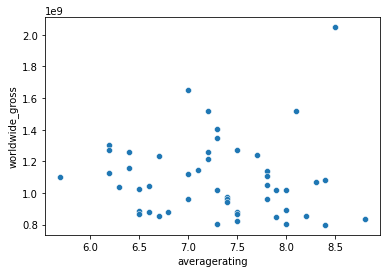

In [49]:
sn.scatterplot(data=mega_table2_votes50, x="averagerating", y="worldwide_gross")

In [57]:
mega_table2_horrormt=mega_table2_votes5.loc[mega_table2_votes5['genres']=='Horror,Mystery,Thriller']
mega_table2_horrormt.sort_values('averagerating')

,Unnamed: 0,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?,month_released
1765,50359,tt5690360,3.2,19650.0,Slender Man,2018,93.0,"Horror,Mystery,Thriller",80.0,"Aug 10, 2018",10000000.0,30564825.0,51723644.0,41723644.0,0.590926,4.172364,2018.0,True,Aug
1298,25910,tt2752758,4.1,15502.0,Devil's Due,2014,89.0,"Horror,Mystery,Thriller",14.0,"Jan 17, 2014",7000000.0,15821461.0,36146087.0,29146087.0,0.437709,4.163727,2014.0,True,Jan
1119,19889,tt2309260,4.2,17763.0,The Gallows,2015,81.0,"Horror,Mystery,Thriller",80.0,"Jul 10, 2015",100000.0,22764410.0,41656474.0,41556474.0,0.546480,415.564740,2015.0,True,Jul
224,1144,tt1204977,4.5,44054.0,Ouija,2014,89.0,"Horror,Mystery,Thriller",60.0,"Oct 24, 2014",5000000.0,50856010.0,103300632.0,98300632.0,0.492311,19.660126,2014.0,True,Oct
903,12668,tt1945044,4.5,5156.0,Exeter,2015,91.0,"Horror,Mystery,Thriller",49.0,"Sep 1, 2015",25000.0,0.0,489792.0,464792.0,0.000000,18.591680,2015.0,True,Sep
1214,23081,tt2473510,4.6,22361.0,Paranormal Activity: The Ghost Dimension,2015,88.0,"Horror,Mystery,Thriller",7.0,"Oct 23, 2015",10000000.0,18297124.0,77959374.0,67959374.0,0.234701,6.795937,2015.0,True,Oct
1007,15959,tt2109184,4.6,58408.0,Paranormal Activity 4,2012,88.0,"Horror,Mystery,Thriller",59.0,"Oct 19, 2012",5000000.0,53900335.0,142817992.0,137817992.0,0.377406,27.563598,2012.0,True,Oct
1434,32087,tt3387542,4.8,36423.0,The Forest,2016,93.0,"Horror,Mystery,Thriller",92.0,"Jan 8, 2016",10000000.0,26594261.0,40749230.0,30749230.0,0.652632,3.074923,2016.0,True,Jan
90,315,tt0872230,4.8,18381.0,My Soul to Take,2010,107.0,"Horror,Mystery,Thriller",68.0,"Oct 8, 2010",25000000.0,14744435.0,16727470.0,-8272530.0,0.881450,-0.330901,2010.0,False,Oct
540,3787,tt1540011,5.0,36867.0,Blair Witch,2016,89.0,"Horror,Mystery,Thriller",1.0,"Sep 16, 2016",10000000.0,20777061.0,38985577.0,28985577.0,0.532942,2.898558,2016.0,True,Sep


<AxesSubplot:xlabel='production_budget', ylabel='earnings/cost_ratio'>

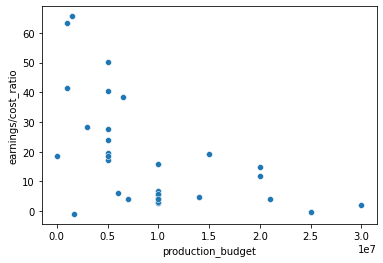

In [59]:
mega_table2_horrormt=mega_table2_horrormt.drop(1119)
sn.scatterplot(data=mega_table2_horrormt, x="production_budget", y="earnings/cost_ratio")

In [58]:
mega_table2_horrormt.describe()

,Unnamed: 0,averagerating,numvotes,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,32.000000,32.00000
mean,24368.562500,5.565625,84817.843750,2014.687500,95.093750,55.031250,8.993281e+06,5.168044e+07,1.072876e+08,9.829433e+07,0.467805,30.726449,2014.78125
std,18221.919142,1.041899,98552.641187,2.644989,10.617573,27.175041,7.442543e+06,4.459143e+07,8.734468e+07,8.575813e+07,0.179106,72.489579,2.63640
min,70.000000,3.200000,1115.000000,2010.000000,80.000000,1.000000,2.500000e+04,0.000000e+00,8.074500e+04,-8.272530e+06,0.000000,-0.951358,2010.00000
25%,8050.250000,4.800000,31444.250000,2012.750000,87.500000,43.000000,5.000000e+06,2.226757e+07,4.269197e+07,4.152029e+07,0.372330,4.361402,2012.75000
50%,23085.000000,5.500000,56028.500000,2015.000000,93.000000,59.500000,6.750000e+06,3.474961e+07,8.532644e+07,6.844222e+07,0.501111,15.344283,2015.00000
75%,38492.250000,6.200000,93416.250000,2017.000000,103.000000,73.250000,1.000000e+07,5.806441e+07,1.294622e+08,1.244622e+08,0.546894,27.733349,2017.00000
max,57280.000000,7.700000,400474.000000,2019.000000,118.000000,93.000000,3.000000e+07,1.760407e+08,3.180001e+08,2.980001e+08,0.881450,415.564740,2019.00000


In [60]:
horrortableau=pd.read_csv('action_table.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'action_table.csv'